In [4]:
import os, sys
import pandas as pd 
import numpy as np 
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt 


In [5]:
#Definir las rutas de los directorios 
from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent 

In [6]:
query = """
SELECT  
  *
FROM 
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` 

LIMIT 
  1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


In [7]:
# get only numeric colums 
numerics = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [8]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

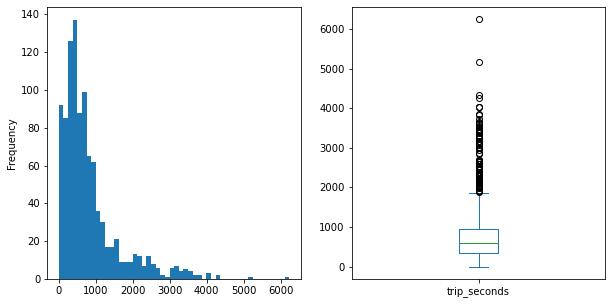

In [9]:
fig, ax = plt.subplots(ncols =2, nrows=1,figsize=(10,5))
num_df['trip_seconds'].plot(kind='hist',bins=50, ax=ax[0])
num_df['trip_seconds'].plot(kind='box')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


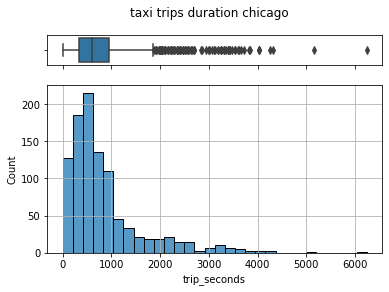

In [10]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#sharex es compartir el eje x 
#ax_box nombre de la grafica de arriba 
#ax_his nombre de la grafica de abajo 
# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
#f.savefig(plot_path)

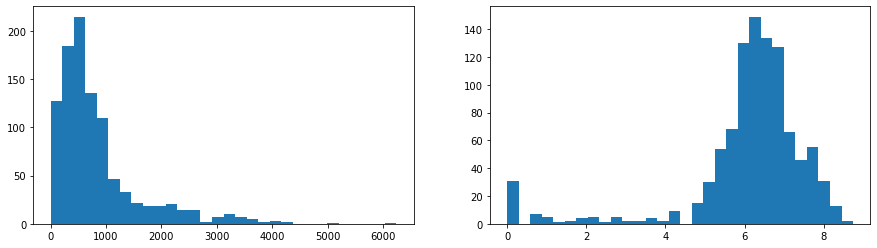

In [11]:
#log-transform 
x = num_df['trip_seconds']
log_x = np.log(x+1)
#numpy trasforma toda la columna
f, ax = plt.subplots(1,2, figsize =(15,4))

ax[0].hist(x, bins=30)
ax[1].hist(log_x, bins=30);
#El ; para que no salgan el monton de numeros y solo salga la grafica 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

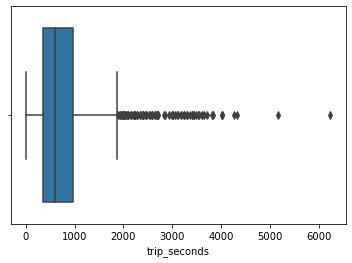

In [12]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

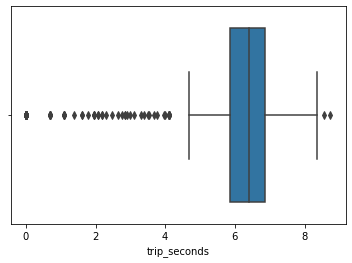

In [13]:
sns.boxplot(log_x)

In [14]:
log_x.describe()  #info estadistica basica 
log_x.mean() #la mediana 

6.101626616629768

In [15]:
np.exp(log_x.mean())

446.58359990923947

In [16]:
x.mean()

827.44

(0.0, 10.0)

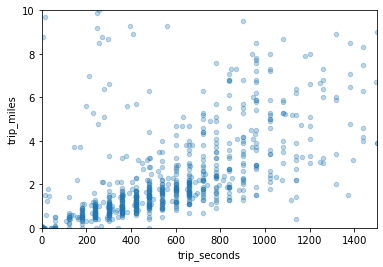

In [17]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_miles', alpha=0.3) #alpha es 
plt.xlim(0,1500)
plt.ylim(0,10)

In [18]:
x = 'trip_seconds'
y = 'trip_miles'
num_df [[x,y]].corr() #solo analisamos la correlacion lineal

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

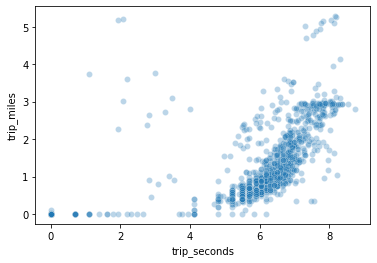

In [19]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)
sns.scatterplot( x=log_x, y=log_y, alpha=0.3)

In [20]:
log_num_df = pd.DataFrame(
    columns = [x,y]
)
log_num_df[x] = log_x
log_num_df[y] = log_y

log_num_df.corr()


,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


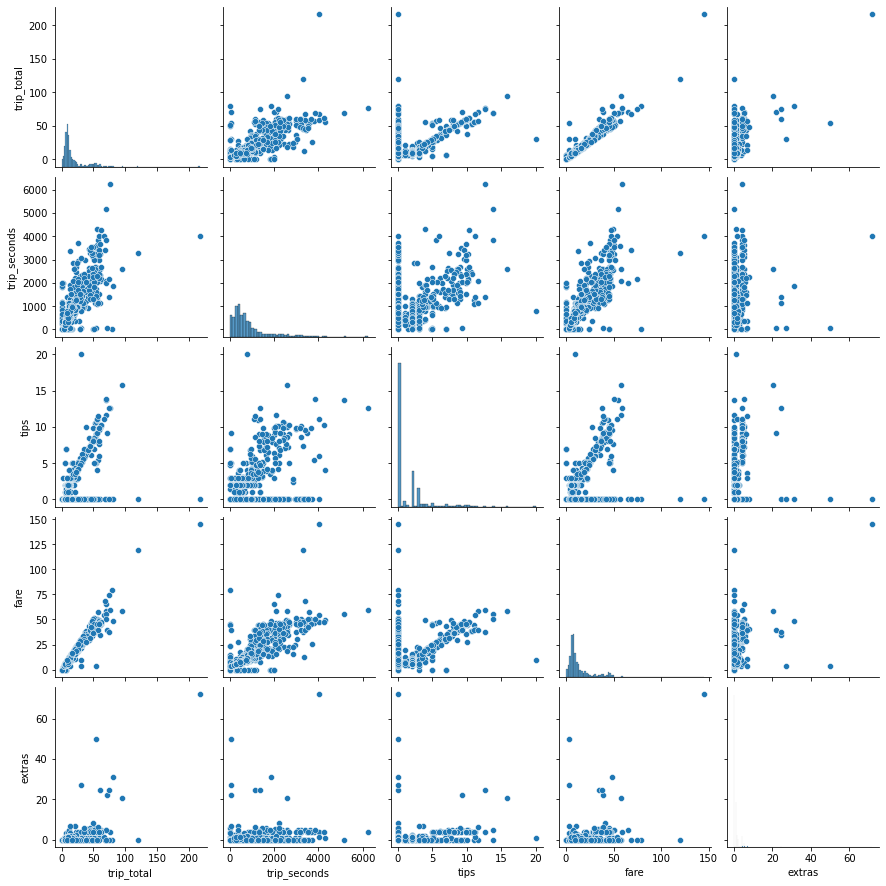

In [21]:
cols = ['trip_total', 'trip_seconds', 'tips', 'fare', 'extras']
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

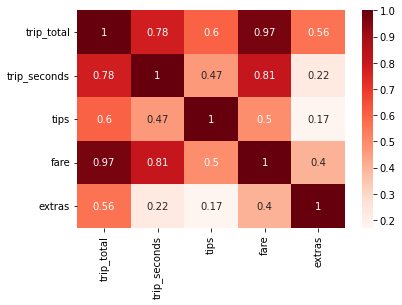

In [22]:
correlations = num_df[cols].corr()
sns.heatmap(correlations, cmap = 'Reds', annot = True)

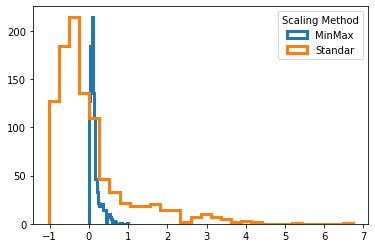

In [23]:
x = num_df['trip_seconds']
x_min = x.min()
x_max = x.max()
x_mean = x.mean() #Media
x_std = x.std()
x_MinMax_scaled = ((x-x_min)/(x_max - x_min)) #MinMax Scaler
x_std_scaled = (x-x_mean)/x_std

plt.hist(x_MinMax_scaled,bins=30, label='MinMax', histtype='step', lw=3)  #MinMax Scaled
plt.hist(x_std_scaled   ,bins=30, label='Standar',histtype='step', lw=3); #Standard Scaler

plt.legend(title='Scaling Method')

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler().fit(num_df[cols]) #entreno el modelo 
data_min_max_scaled = minmax_scaler.transform(num_df[cols])  #trasformo  de acuerdo a lo entrenado 

In [25]:
num_df[cols]

,trip_total,trip_seconds,tips,fare,extras
0,9.25,600,2.00,6.75,0.0
1,21.50,960,0.00,21.50,0.0
2,37.00,3000,0.00,37.00,0.0
3,46.58,2220,6.08,35.50,4.5
4,52.40,1560,8.65,39.25,4.0
...,...,...,...,...,...
995,26.00,2040,0.00,26.00,0.0
996,9.50,480,0.00,8.00,1.5
997,23.30,1260,3.80,19.00,0.0
998,9.25,720,0.00,9.25,0.0


In [26]:
data_min_max_scaled

array([[0.04258261, 0.09615385, 0.1       , 0.04648596, 0.        ],
       [0.09903682, 0.15384615, 0.        , 0.14821712, 0.        ],
       [0.17046869, 0.48076923, 0.        , 0.25512104, 0.        ],
       ...,
       [0.10733214, 0.20192308, 0.19      , 0.13097455, 0.        ],
       [0.04258261, 0.11538462, 0.        , 0.06372853, 0.        ],
       [0.07484216, 0.15384615, 0.        , 0.11200772, 0.        ]])

In [27]:
num_df_minmax_scaled = pd.DataFrame(
    columns = num_df[cols].columns,
    data    = data_min_max_scaled 
)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556
